# Encoding Categorical Data:

### Description : Different methods of Encoding.
### Refernces :www.datacamp.com
### Link : (https://www.datacamp.com/community/tutorials/categorical-data)  


## Import Libraries:

In [1]:
import pandas as pd 
import numpy as np

df = pd.read_csv("/home/ritesh/Desktop/md_work/data set/flights.csv")
df.head()

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2014,1,1,1.0,96.0,235.0,70.0,AS,N508AS,145,PDX,ANC,194.0,1542,0.0,1.0
1,2014,1,1,4.0,-6.0,738.0,-23.0,US,N195UW,1830,SEA,CLT,252.0,2279,0.0,4.0
2,2014,1,1,8.0,13.0,548.0,-4.0,UA,N37422,1609,PDX,IAH,201.0,1825,0.0,8.0
3,2014,1,1,28.0,-2.0,800.0,-23.0,US,N547UW,466,PDX,CLT,251.0,2282,0.0,28.0
4,2014,1,1,34.0,44.0,325.0,43.0,AS,N762AS,121,SEA,ANC,201.0,1448,0.0,34.0


In [2]:
df.shape


(162049, 16)

In [3]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162049 entries, 0 to 162048
Data columns (total 16 columns):
year         162049 non-null int64
month        162049 non-null int64
day          162049 non-null int64
dep_time     161192 non-null float64
dep_delay    161192 non-null float64
arr_time     161061 non-null float64
arr_delay    160748 non-null float64
carrier      162049 non-null object
tailnum      161801 non-null object
flight       162049 non-null int64
origin       162049 non-null object
dest         162049 non-null object
air_time     160748 non-null float64
distance     162049 non-null int64
hour         161192 non-null float64
minute       161192 non-null float64
dtypes: float64(7), int64(5), object(4)
memory usage: 19.8+ MB
None


In [4]:
# if you will only be dealing with categorical features in this tutorial, it's better to filter them out. You can create a separate DataFrame consisting of only these features by running the following command.

cat_df = df.select_dtypes(include=['object']).copy()
cat_df.head()

,carrier,tailnum,origin,dest
0,AS,N508AS,PDX,ANC
1,US,N195UW,SEA,CLT
2,UA,N37422,PDX,IAH
3,US,N547UW,PDX,CLT
4,AS,N762AS,SEA,ANC


In [5]:
# To know the count of distinct categories within the feature you can chain the previous code with the .count() method:

print(cat_df['carrier'].value_counts().count())

11


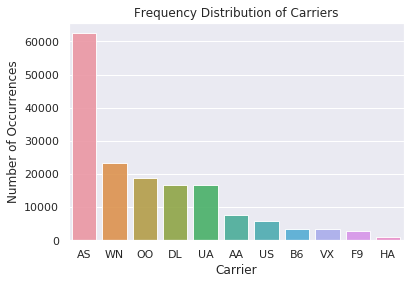

In [7]:
# Visual exploration is the most effective way to extract information between variables.
# Plot a barplot of the frequency distribution of a categorical feature using the seaborn package.

import seaborn as sns
import matplotlib.pyplot as plt

carrier_count = cat_df['carrier'].value_counts()
sns.set(style="darkgrid")
sns.barplot(carrier_count.index, carrier_count.values, alpha=0.9)
plt.title('Frequency Distribution of Carriers')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Carrier', fontsize=12)
plt.show()

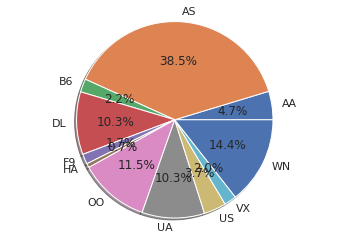

In [8]:
# Similarly,we could plot a pie chart with the matplotlib library to get the same information.

labels = cat_df['carrier'].astype('category').cat.categories.tolist()
counts = cat_df['carrier'].value_counts()
sizes = [counts[var_cat] for var_cat in labels]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=True) #autopct is show the % on plot
ax1.axis('equal')
plt.show()

# Encoding Categorical Data

## The techniques that you'll cover are the following:

* Replacing values
* Encoding labels
* One-Hot encoding

## 1) Replacing values :
* This can be achieved with the help of the replace() function in pandas. The idea is that you have the liberty to choose whatever numbers you want to assign to the categories according to the business use case.

In [9]:
replace_map = {'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4,
                                 'F9': 5, 'HA': 6, 'OO': 7 , 'UA': 8 , 'US': 9,'VX': 10,'WN': 11}}
print(replace_map)
# Note : that defining a mapping via a hard coded dictionary is easy when the number of categories is low, like in this case which is 11. 

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [10]:
# We can achieve the same mapping with the help of dictionary comprehensions.
# This will be useful when the categories count is high and you don't want to type out each mapping.

labels = cat_df['carrier'].astype('category').cat.categories.tolist()
replace_map_comp = {'carrier' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}

print(replace_map_comp)

{'carrier': {'AA': 1, 'AS': 2, 'B6': 3, 'DL': 4, 'F9': 5, 'HA': 6, 'OO': 7, 'UA': 8, 'US': 9, 'VX': 10, 'WN': 11}}


In [11]:
# copy dataframe so that whatever changes you are doing happen only in the copied one.

cat_df_replace = cat_df.copy()

# Use the replace() function on the DataFrame by passing the mapping dictionary as argument:

cat_df_replace.replace(replace_map_comp, inplace=True)

print(cat_df_replace.head())

   carrier tailnum origin dest
0        2  N508AS    PDX  ANC
1        9  N195UW    SEA  CLT
2        8  N37422    PDX  IAH
3        9  N547UW    PDX  CLT
4        2  N762AS    SEA  ANC


In [12]:
# check the dtype of the newly encoded column, which is now converted to integers.

print(cat_df_replace['carrier'].dtype)

int64


In [13]:
# In Python, it's a good practice to typecast categorical features to a category dtype because they make the operations on such columns much faster than the object dtype. You can do the typecasting by using .astype() method on your columns like shown below:

cat_df_flights_lc = cat_df.copy()
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].astype('category')
cat_df_flights_lc['origin'] = cat_df_flights_lc['origin'].astype('category')                                                              

print(cat_df_flights_lc.dtypes)

carrier    category
tailnum      object
origin     category
dest         object
dtype: object


## 2)Label Encoding :
* Another approach is to encode categorical values with a technique called "label encoding", which allows you to convert each value in a column to a number. Numerical labels are always between 0 and n_categories-1.

In [14]:
# We can do label encoding via attributes .cat.codes on your DataFrame's column.
cat_df_flights_lc['carrier'] = cat_df_flights_lc['carrier'].cat.codes
cat_df_flights_lc.head()                                    # alphabetically labeled from 0 to 10

,carrier,tailnum,origin,dest
0,1,N508AS,PDX,ANC
1,8,N195UW,SEA,CLT
2,7,N37422,PDX,IAH
3,8,N547UW,PDX,CLT
4,1,N762AS,SEA,ANC


In [15]:
# Sometimes,if we just want to encode a bunch of categories within a feature to some numeric value and encode all the other categories to some other numeric value.
# we could do this by using numpy's where() function like shown below.

cat_df_flights_specific = cat_df.copy()
cat_df_flights_specific['US_code'] = np.where(cat_df_flights_specific['carrier'].str.contains('US'), 1, 0)

cat_df_flights_specific.head()

,carrier,tailnum,origin,dest,US_code
0,AS,N508AS,PDX,ANC,0
1,US,N195UW,SEA,CLT,1
2,UA,N37422,PDX,IAH,0
3,US,N547UW,PDX,CLT,1
4,AS,N762AS,SEA,ANC,0


In [16]:
# We can achieve the same label encoding using scikit-learn's LabelEncoder:

cat_df_flights_sklearn = cat_df.copy()

from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
cat_df_flights_sklearn['carrier_code'] = lb_make.fit_transform(cat_df['carrier'])

cat_df_flights_sklearn.head()                                  # Results in appending a new column to df

,carrier,tailnum,origin,dest,carrier_code
0,AS,N508AS,PDX,ANC,1
1,US,N195UW,SEA,CLT,8
2,UA,N37422,PDX,IAH,7
3,US,N547UW,PDX,CLT,8
4,AS,N762AS,SEA,ANC,1


* Label encoding is pretty much intuitive and straight-forward and may give you a good performance from your learning algorithm, but it has as disadvantage that the numerical values can be misinterpreted by the algorithm.Should the carrier US (encoded to 8) be given 8x more weight than the carrier AS (encoded to 1) 
* To solve this issue there is another popular way to encode the categories via something called one-hot encoding.

# 3) One-Hot encoding: 
* The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. This has the benefit of not weighting a value improperly.

In [17]:
# scikit-learn also supports one hot encoding via LabelBinarizer and OneHotEncoder.

cat_df_flights_onehot_sklearn = cat_df.copy()

from sklearn.preprocessing import LabelBinarizer

lb = LabelBinarizer()
lb_results = lb.fit_transform(cat_df_flights_onehot_sklearn['carrier'])
lb_results_df = pd.DataFrame(lb_results, columns=lb.classes_)

print(lb_results_df.head())


   AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0   0   1   0   0   0   0   0   0   0   0   0
1   0   0   0   0   0   0   0   0   1   0   0
2   0   0   0   0   0   0   0   1   0   0   0
3   0   0   0   0   0   0   0   0   1   0   0
4   0   1   0   0   0   0   0   0   0   0   0


In [18]:
# This needs to be concatenated back with the original DataFrame, which can be done via pandas' .concat() method. 

result_df = pd.concat([cat_df_flights_onehot_sklearn, lb_results_df], axis=1)

print(result_df.head())

  carrier tailnum origin dest  AA  AS  B6  DL  F9  HA  OO  UA  US  VX  WN
0      AS  N508AS    PDX  ANC   0   1   0   0   0   0   0   0   0   0   0
1      US  N195UW    SEA  CLT   0   0   0   0   0   0   0   0   1   0   0
2      UA  N37422    PDX  IAH   0   0   0   0   0   0   0   1   0   0   0
3      US  N547UW    PDX  CLT   0   0   0   0   0   0   0   0   1   0   0
4      AS  N762AS    SEA  ANC   0   1   0   0   0   0   0   0   0   0   0


* While one-hot encoding solves the problem of unequal weights given to categories within a feature, it is not very useful when there are many categories, as that will result in formation of as many new columns.

# Summary :

## Why Data encoding is necessary for Machine Learning models:
* Many machine learning models, such as regression or SVM, are algebraic. This means that their input must be numerical. To use these models, categories must be transformed into numbers first, before you can apply the learning algorithm on them.
* While some ML packages or libraries might transform categorical data to numeric automatically based on some default embedding method, many other ML packages don’t support such inputs.